# **AlphaFold vs experimental structure**

#### AlphaFold structure prediction

AlphaFold is a deep learning-based protein structure prediction tool developed by DeepMind. It has been widely regarded as a breakthrough in the field of structural bioinformatics, as it can accurately predict protein structures at the atomic level with remarkable speed and efficiency. This has significant implications for drug discovery, protein engineering, and other areas of research.

One of the easiest ways to run AlphaFold is through Google Colaboratory (Colab), a cloud-based platform for running Python code. Colab provides free access to high-end GPUs, which are necessary to run AlphaFold efficiently. By using Colab, researchers and students can run AlphaFold without needing to purchase expensive hardware. The user can simply paste the protein sequence and run AlphaFold. The output will be a predicted protein structure in PDB format, which can be downloaded and visualized.

Predicting the structure of botulinum neurotoxin with AlphaFold takes a considerable amount of time so for this exercise **you will work with a precomputed AlphaFold prediction**.

If you later want to predict the structure of botulinum neurotoxin using AlphaFold you should:
1. Go to https://colab.research.google.com/github/deepmind/alphafold/blob/main/notebooks/AlphaFold.ipynb
2. Upload the BoNT fasta sequence:
```
PFVNKQFNYKDPVNGVDIAYIKIPNVGQMQPVKAFKIHNKIWVIPERDTFTNPEEGDLNPPPEAKQVPVSYYDSTYLSTDNEKDNYLKGVTKLFERIYSTDLGRMLLTSIVRGIPFWGGSTIDTELKVIDTNCINVIQPDGSYRSEELNLVIIGPSADIIQFECKSFGHEVLNLTRNGYGSTQYIRFSPDFTFGFEESLEVDTNPLLGAGKFATDPAVTLAHELIHAGHRLYGIAINPNRVFKVNTNAYYEMSGLEVSFEELRTFGGHDAKFIDSLQENEFRLYYYNKFKDIASTLNKAKSIVGTTASLQYMKNVFKEKYLLSEDTSGKFSVDKLKFDKLYKMLTEIYTEDNFVKFFKVLNRKTYLNFDKAVFKINIVPKVNYTIYDGFNLRNTNLAANFNGQNTEINNMNFTKLKNFTGLFEFYKLLCVRGIITSKTKSLDKGYNKALNDLCIKVNNWDLFFSPSEDNFTNDLNKGEEITSDTNIEAAEENISLDLIQQYYLTFNFDNEPENISIENLSSDIIGQLELMPNIERFPNGKKYELDKYTMFHYLRAQEFEHGKSRIALTNSVNEALLNPSRVYTFFSSDYVKKVNKATEAAMFLGWVEQLVYDFTDETSEVSTTDKIADITIIIPYIGPALNIGNMLYKDDFVGALIFSGAVILLEFIPEIAIPVLGTFALVSYIANKVLTVQTIDNALSKRNEKWDEVYKYIVTNWLAKVNTQIDLIRKKMKEALENQAEATKAIINYQYNQYTEEEKNNINFNIDDLSSKLNESINKAMININKFLNQCSVSYLMNSMIPYGVKRLEDFDASLKDALLKYIYDNRGTLIGQVDRLKDKVNNTLSTDIPFQLSKYVDNQRLLSTFTEYIKNIINTSILNLRYESNHLIDLSRYASKINIGSKVNFDPIDKNQIQLFNLESSKIEVILKNAIVYNSMYENFSTSFWIRIPKYFNSISLNNEYTIINCMENNSGWKVSLNYGEIIWTLQDTQEIKQRVVFKYSQMINISDYINRWIFVTITNNRLNNSKIYINGRLIDQKPISNLGNIHASNNIMFKLDGCRDTHRYIWIKYFNLFDKELNEKEIKDLYDNQSNSGILKDFWGDYLQYDKPYYMLNLYDPNKYVDVNNVGIRGYMYLKGPRGSVMTTNIYLNSSLYRGTKFIIKKYASGNKDNIVRNNDRVYINVVVKNKEYRLATNASQAGVEKILSALEIPDVGNLSQVVVMKSKNDQGITNKCKMNLQDNNGNDIGFIGFHQFNNIAKLVASNWYNRQIERSSRTLGCSWEFIPVDDGWGERPL
```
3. Run the predictor

#### Exercise 4.1 - Load the crystal structure and the AlphaFold structure of botulinum neurotoxin and visualize them

**Import the necessary modules**: We will need to import some classes from the Biopython's PDB module and the nglview library.

In [1]:
import nglview as nv
import numpy as np
from Bio.Align import PairwiseAligner
from Bio.PDB import PDBParser, PPBuilder

A Jupyter Widget

**Load the crystal structure and the AlphaFold predicted structure**: We will use a `PDBParser` object from the PDB module to load the protein structure from the Protein Data Bank and the one that AlphaFold predicted.

In [2]:
parser = PDBParser(QUIET = True)
crystal_structure = parser.get_structure("", "3V0C.pdb")
alphafold_structure = parser.get_structure("", "AF-P0DPI0-F1-model_v4.pdb")

**Visualize the crystal structure and the AlphaFold predicted structure**: We will use the `show_biopython` method of nglview to load each of the two biopython structures and the `add_cartoon` method to show the proteins in the cartoon representation and colored in gray. Finally, we will center the view using the `center` method.

In [3]:
view1 = nv.show_biopython(crystal_structure, default=False)
view1.add_cartoon(selection="protein", color="gray")
view1.center()
view1

A Jupyter Widget

In [4]:
view2 = nv.show_biopython(alphafold_structure, default=False)
view2.add_cartoon(selection="protein", color="gray")
view2.center()
view2

A Jupyter Widget

Do you think AlphaFold did a good job in predicting the structure of botulinum neurotoxin? How would you quantify the similarity between the experimental structure and the predicted structure?

#### Exercise 4.2 - Calculate the RMSD between the crystal structure and the AlphaFold structure of botulinum neurotoxin

$RMSD$ (Root Mean Square Deviation) is a commonly used metric in structural bioinformatics to quantify the similarity between two or more protein structures. It measures the deviation of a target set of coordinates (e.g. a predicted structure) to a reference set of coordinates (e.g. an experimentally determined structure). A lower $RMSD$ value indicates a higher degree of similarity between the structures, with $RMSD=0$ indicating a perfect overlap.

To calculate $RMSD$ between two protein structures, we need to first align the structures to each other. Once the structures are aligned, we can calculate the $RMSD$ by comparing the positions of each corresponding atom in the two structures.

The RMSD is calculated using the following formula:
<center>
<font size="5">
$RMSD = \sqrt{\frac{\sum_{i = 0}^N (x_i - y_i)^2}{N}}$
</font>
</center>

where **N** is the number of corresponding atoms, $x_i$ is the coordinate vector for target atom $i$, $x_i$ is the coordinate vector for reference atom $i$. The sum is taken over all corresponding atoms.

**Generate protein sequences from the crystal structure and AlphaFold predicted structure**: We will use the `PPBuilder` method from `Biopython` to break down the protein structures into individual peptides. Then, we will iterate over each peptide to retrieve its amino acid sequence and concatenate all the sequences into a single string using the `join` method. This will create two strings, one for each structure, that contain the amino acid sequences of the proteins.

In [5]:
ppb=PPBuilder()
seq1 = "".join([str(pp.get_sequence()) for pp in ppb.build_peptides(crystal_structure)])
seq2 = "".join([str(pp.get_sequence()) for pp in ppb.build_peptides(alphafold_structure)])

**Perform pairwise sequence alignment**: We will use the `PairwiseAligner` method from `Biopython` to align the amino acid sequences generated from the crystal structure and AlphaFold predicted structure. The align method will take the two protein sequences as inputs and return a list of alignments. Since we only want the best alignment, we will select the first element of the list. Finally, we will print the alignment.

In [15]:
aligner = PairwiseAligner()
alignment = aligner.align(seq1, seq2)[0]
print(alignment)

-PFVNKQFNYKDPVNGVDIAYIKIPNA-GQMQPVKAFKIHNKIWVIPERDTFTNPEEGDLNPPPEAKQVPVSYYDSTYLSTDNEKDNYLKGVTKLFERIYSTDLGRMLLTSIVRGIPFWGGSTIDTELKVIDTNCINVIQPDGSYRSEELNLVIIGPSADIIQFECKSFGHEVLNLTRNGYGSTQYIRFSPDFTFGFEESLEVDTNPLLGAGKFATDPAVTLAHQ-LIHAGHRLYGIAINPNRVFKVNTNAYYEMSGLEVSFEELRTFGGHDAKFIDSLQENEFRLYYYNKFKDIASTLNKAKSIVGTTASLQYMKNVFKEKYLLSEDTSGKFSVDKLKFDKLYKMLTEIYTEDNFVKFFKVLNA-KTF-LNFDKAVFKINIVPKVNYTIYDGFNLRNTNLAANFNGQNTEINNMNFTKLKNFTGLFEFYKLLCVR--------------N----DLCIKVNNWDLFFSPSEDNFTNDLNKGEEITSDTNIEAAEENISLDLIQQYYLTFNFDNEPENISIENLSSDIIGQLELMPNIERFPNGKKYELDKYTMFHYLRAQEFEHGKSRIALTNSVNEALLNPSRVYTFFSSDYVKKVNKATEAAMFLGWVEQLVYDFTDETSEVSTTDKIADITIIIPYIGPALNIGNMLYKDDFVGALIFSGAVILLEFIPEIAIPVLGTFALVSYIANKVLTVQTIDNALSKRNEKWDEVYKYIVTNWLAKVNTQIDLIRKKMKEALENQAEATKAIINYQYNQYTEEEKNNINFNIDDLSSKLNESINKAMININKFLNQCSVSYLMNSMIPYGVKRLEDFDASLKDALLKYIYDNRGTLIGQVDRLKDKVNNTLSTDIPFQLSKYVDNQRLLSTFTEYIKNIINTSILNLRYESNHLIDLSRYASKINIGSKVNFDPIDKNQIQLFNLESSKIEVILKNAIVYNSMYENFSTSFWIRIPKYFNSISLNNEYTIINCMENNSGWKVSLNYGEIIWTLQDTQEIKQR

**Extract alignment positions**: We will extract the positions of the aligned amino acids in the protein structures using the aligned attribute of the alignment object. First, we will use tuple unpacking to assign the aligned residue ranges to the variables aligned_ranges1 and aligned_ranges2. Then, we will create empty lists ids1 and ids2 to store the positions of the aligned amino acids in each structure. Next, we will iterate over aligned_ranges1 and aligned_ranges2 in parallel using the zip method. For each pair of aligned residue ranges, we will use the range function to create a list of residue IDs for each aligned segment and append those lists to ids1 and ids2. The resulting lists will contain the positions of the aligned residues in each structure.

In [17]:
aligned_ranges1, aligned_ranges2 = alignment.aligned
ids1, ids2 = [], []
for aligned_range1, aligned_range2 in zip(aligned_ranges1, aligned_ranges2):
    ids1.extend(list(range(aligned_range1[0], aligned_range1[1])))
    ids2.extend(list(range(aligned_range2[0], aligned_range2[1])))

**Extract aligned alpha-carbon atoms**: We will select the alpha-carbon atoms that correspond to the aligned residues in the crystal structure and AlphaFold predicted structure. We create lists of all alpha-carbon atoms using the get_atoms method and filtering for atoms with the name "CA". We then select the alpha-carbon atoms that correspond to the aligned residues using lists of aligned residue IDs. The resulting lists contain the alpha-carbon atoms that correspond to the aligned residues.

In [12]:
ca_atoms1 = [atom for atom in crystal_structure.get_atoms() if atom.name == 'CA']
ca_atoms2 = [atom for atom in alphafold_structure.get_atoms() if atom.name == 'CA']
aligned_ca_atoms1 = [ca_atoms1[id1] for id1 in ids1]
aligned_ca_atoms2 = [ca_atoms2[id2] for id2 in ids2]

**Calculate RMSD**: We will now calculate the root-mean-square deviation (RMSD) between these two sets of corresponding alpha-carbon atoms. For each pair of corresponding atoms we need the square difference between their coordinates. We then calculate the sum of the squared differences, take the mean of that sum and then take the square root of the result to obtain the RMSD. Finally, we print the value of RMSD.

In [18]:
#write the code to calculate the RMSD
#you can obtain the coordinate of each atom using atom.get_coord()

## **Copyright notice**

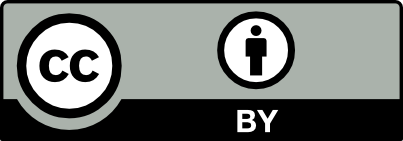

This work by NVO Bioinformatika is licensed under CC BY 4.0.

To view a copy of this license, visit:

http://creativecommons.org/licenses/by/4.0/.